In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.exponential_regression import ExponentialRegression
from src.loss import Chi2Loss

from sklearn.preprocessing import StandardScaler

## One exponential term example

$2\exp(-0.25t) + \epsilon,\:\epsilon\in\mathcal{N}(0, (\frac{1}{2})^2)$

In [2]:
measurements = 100
measurement_errors = 1

t = np.linspace(-10, 10, measurements).reshape(-1, 1)
y = (2 * np.exp(-0.25 * t) + np.random.normal(0, measurement_errors, t.shape)).ravel()

In [3]:
scaler = StandardScaler()
t_scaled = scaler.fit_transform(t.reshape(-1, 1))

In [4]:
loss = Chi2Loss(measurements, measurement_errors)
model = ExponentialRegression(n_terms=1, loss_function=loss)
model.fit(t_scaled, y)

ExponentialRegression(loss_function=Chi2Loss)

In [5]:
y_pred = model.predict(t_scaled)

lambda = [2.07865487] , omega = [-1.42469097]


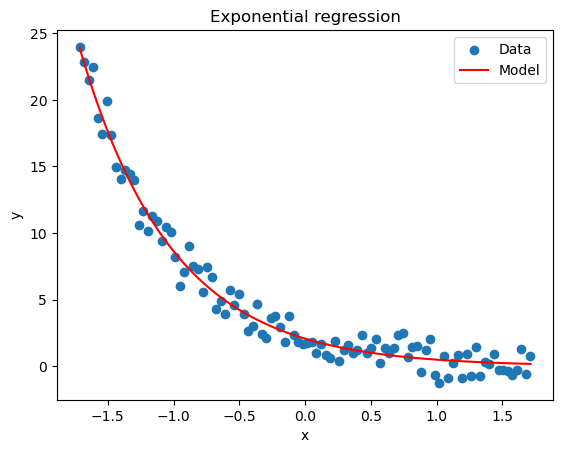

In [6]:
plt.scatter(t_scaled, y)
plt.plot(t_scaled, y_pred, color='red')

plt.title("Exponential regression")
plt.legend(["Data", "Model"])
plt.xlabel("x")
plt.ylabel("y")
print('lambda =', model.lambda_, ', omega =', model.omega_)

## Two exponential terms example (poor fit)

$2\exp(-0.25t)-5\exp(-2t)  + \epsilon,\:\epsilon\in\mathcal{N}(0, (\frac{1}{20})^2)$

In [7]:
measurements = 100
measurement_errors = 1 / 10
t = np.linspace(0, 10, measurements).reshape(-1, 1)
y = (2 * np.exp(-0.25 * t) + (-5) * np.exp(-2 * t)).ravel()
y += np.random.normal(0, measurement_errors, measurements)

In [8]:
scaler = StandardScaler()
t_scaled = scaler.fit_transform(t)

Text(0, 0.5, 'y')

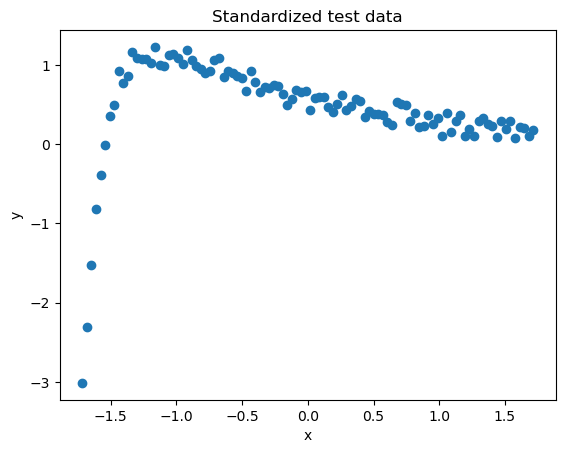

In [9]:
plt.scatter(t_scaled, y)
plt.title('Standardized test data')
plt.xlabel("x")
plt.ylabel("y")

In [10]:
loss = Chi2Loss(measurements, measurement_errors)
model = ExponentialRegression(n_terms=2, loss_function=loss)
model.fit(t_scaled, y)

/home/neepaw/CodeProjects/Pycharm/ExponentialRegression/src/loss/chi2_loss.py:19: RuntimeWarning: overflow encountered in matmul
  return np.float_(residuals.T @ self._weights @ residuals)


ExponentialRegression(loss_function=Chi2Loss, n_terms=2)

lambda = [0.23279243 0.23809723]
omega = [-0.06726277 -0.0977562 ]


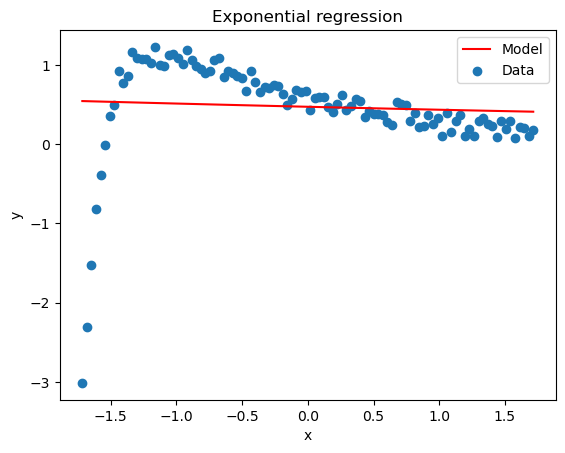

In [11]:
plt.plot(t_scaled, model.predict(t_scaled), color='red')
plt.scatter(t_scaled, y)
plt.title("Exponential regression")
plt.legend(["Model", "Data"])
plt.xlabel("x")
plt.ylabel("y")

print('lambda =', model.lambda_)
print('omega =', model.omega_)

## Two exponential terms example (good fit)

We can try to fit the model with a better initial guess for the parameters.

Initial guesses may be found by grid search or data inspection

In [12]:
measurements = 100
measurement_errors = 1 / 5
t = np.linspace(0, 10, measurements).reshape(-1, 1)
y = (2 * np.exp(-0.25 * t) + (-5) * np.exp(-2 * t)).ravel()
y += np.random.normal(0, measurement_errors, measurements)

In [13]:
scaler = StandardScaler()
t_scaled = scaler.fit_transform(t)

In [14]:
loss = Chi2Loss(measurements, measurement_errors)
model = ExponentialRegression(n_terms=2, loss_function=loss,
                              initial_lambda=np.array([1., -1.]), initial_omega=np.array([-1., -1.]))
model.fit(t_scaled, y)

ExponentialRegression(initial_lambda=array([ 1., -1.]),
                      initial_omega=array([-1., -1.]), loss_function=Chi2Loss,
                      n_terms=2)

lambda = [ 5.79596606e-01 -8.07744036e-05]
omega = [-0.65774852 -6.41486869]


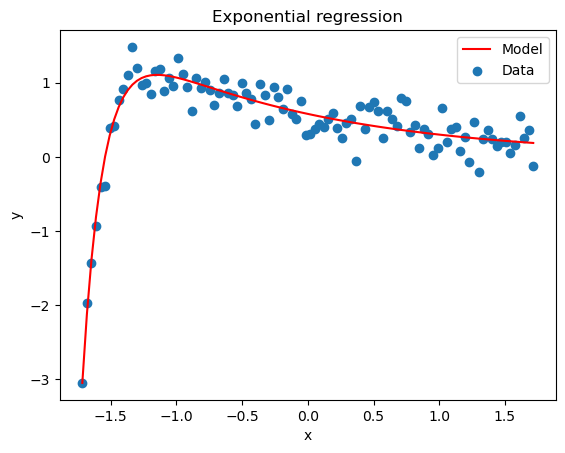

In [15]:
plt.plot(t_scaled, model.predict(t_scaled), color='red')
plt.scatter(t_scaled, y)
plt.title("Exponential regression")
plt.legend(["Model", "Data"])
plt.xlabel("x")
plt.ylabel("y")

print('lambda =', model.lambda_)
print('omega =', model.omega_)